In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score


# 1. Dataset

dimensions de X:  (100, 2)
dimensions de y:  (100, 1)


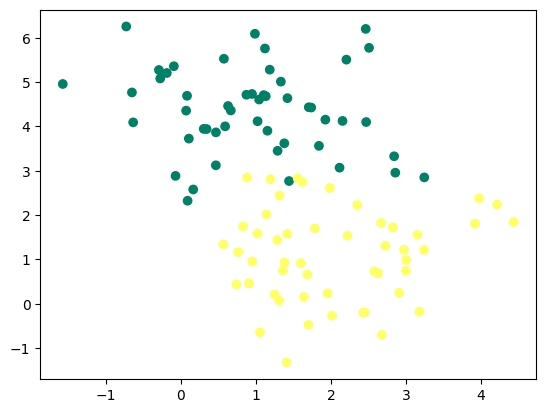

In [73]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
#X[:, 1] = X[:, 1] * 10
y = y.reshape((y.shape[0], 1))

print('dimensions de X: ', X.shape)
print('dimensions de y: ', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# Normalisation

In [74]:
h = 100
lim = 10
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)
W11, W22 = np.meshgrid(W1, W2)
W_final = np.c_[W11.ravel(), W22.ravel()].T
W_final.shape
#W11.shape

(2, 10000)

In [75]:
b = 0
Z = X.dot(W_final) + b
A = 1 / (1 + np.exp(-Z))
A.shape

epsilon = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A+epsilon) - (1-y) * np.log(1-A+epsilon), axis=0).reshape(W11.shape)
L.shape

(100, 100)

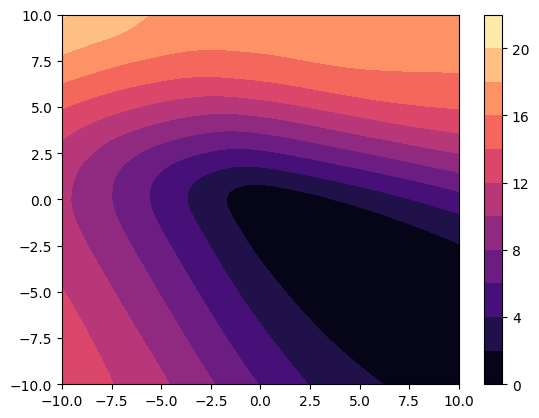

In [76]:
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.colorbar()

# 2. Fonctions du modele

In [77]:
def initialsisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [78]:
W, b = initialsisation(X)
#b.shape

In [79]:
def model(X, W, b):
    Z = X.dot(W) + b
    #print(Z.max())
    A = 1 / (1 + np.exp(-Z))
    return A

In [80]:
A = model(X, W, b)
#A.shape

In [81]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A+epsilon) - (1-y) * np.log(1-A+epsilon))

In [82]:
#log_loss(A, y)

In [83]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A-y)
    return (dW, db)

In [84]:
dW, db = gradients(A, X, y)
#db.shape

In [85]:
def update(dW, db, W, b, learnig_rate):
    W = W - learnig_rate * dW
    b = b - learnig_rate * db
    return (W, b)

In [86]:
def predict(X, W, b):
    A =  A = model(X, W, b)
    #print(A)
    return 0.5 <= A

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
from tqdm import tqdm 

In [89]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

In [90]:
def artificial_neurone2(X, y, learnig_rate=0.1, n_iter=100):
    W, b = initialsisation(X)
    acc = []
    Loss = []
    for i in tqdm(range(n_iter)):
        # activations
        A = model(X, W, b)
        
        if i %10 == 0:
            # calcul du coût
            Loss.append(log_loss(A, y))
            
            # calcul de l'accuracy
            y_pred = predict(X, W, b)
            acc.append(accuracy_score(y, y_pred))
            
            # mise a jour
            dW, db = gradients(A, X, y)
            W, b = update(dW, db, W, b, learnig_rate)
        
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(Loss)
    plt.subplot(1, 2, 2)
    plt.plot(acc)
    plt.show()

    return (W, b)

In [91]:
def artificial_neurone3(X_train, y_train, X_test, y_test, learnig_rate=0.1, n_iter=100):
    W, b = initialsisation(X_train)
    
    train_loss = []
    train_acc = []
    
    test_loss = []
    test_acc = []
    
    for i in tqdm(range(n_iter)):
        # activations
        A = model(X_train, W, b)
        
        if i %10 == 0:
            
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))
            
            # Train
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
            
            # mise a jour
            dW, db = gradients(A, X_train, y_train)
            W, b = update(dW, db, W, b, learnig_rate)
        
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()
    
    return (W, b)

100%|██████████| 100/100 [00:00<00:00, 22310.13it/s]


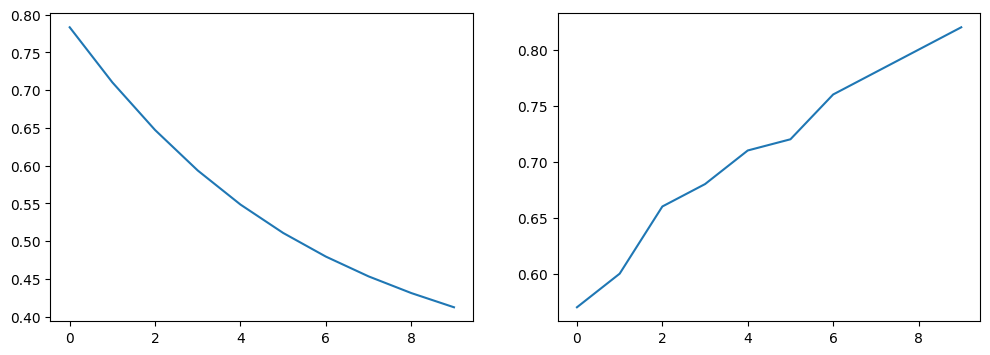

In [92]:
W, b = artificial_neurone(X, y)

In [93]:
W, b

(array([[-0.17642234],
        [-0.66054884]]),
 array([1.48086481]))

# 3. Frontiere de décision

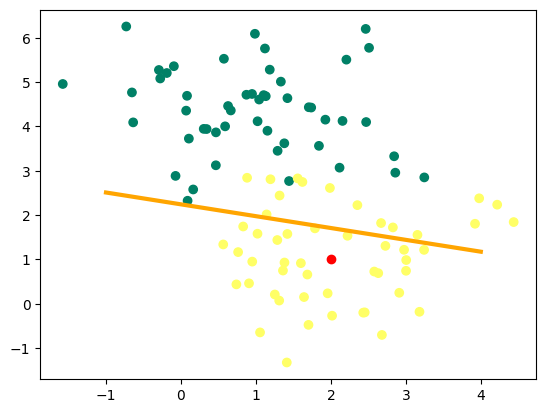

array([ True])

In [94]:
new_plant = np.array([2, 1])
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3);
plt.show()
predict(new_plant, W, b)

# Exercice - Cat vs Dog

In [95]:
#from utilities import *
from utilities import *

In [96]:
X_train, y_train, X_test, y_test = load_data()

In [97]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [98]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


In [99]:
x_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
x_train_reshape.shape

(1000, 4096)

In [100]:
x_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
x_test_reshape.shape

(200, 4096)

In [101]:
#W, b = artificial_neurone2(x_train_reshape, y_train, learnig_rate=0.01, n_iter=10000)

100%|██████████| 10000/10000 [01:41<00:00, 98.88it/s]


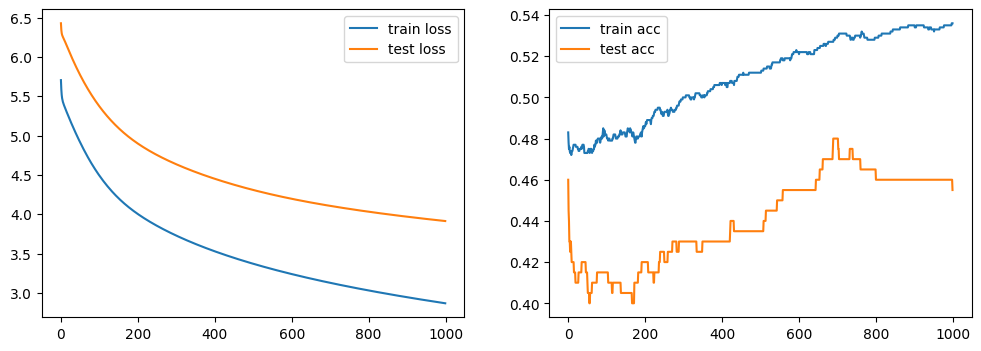

In [102]:
W, b = artificial_neurone3(x_train_reshape, y_train, x_test_reshape, y_test, learnig_rate=0.01, n_iter=10000)